In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

In [2]:
df=pd.read_csv("Airtel.csv",parse_dates=True,index_col='Date')

In [3]:
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-06-04,534.80,535.75,531.25,532.70,533.229306,661985,12196,352989802.0,398176.0,60.15,4.50,-2.10
2021-06-03,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875.0,479872.0,65.22,4.65,0.25
2021-06-02,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610.0,273203.0,55.30,6.50,-0.50
2021-06-01,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691.0,232077.0,46.32,7.85,-5.10
2021-05-31,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441.0,549560.0,59.26,10.40,9.15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2582 entries, 2021-06-04 to 2011-01-03
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open Price                 2582 non-null   float64
 1   High Price                 2582 non-null   float64
 2   Low Price                  2582 non-null   float64
 3   Close Price                2582 non-null   float64
 4   WAP                        2582 non-null   float64
 5   No.of Shares               2582 non-null   int64  
 6   No. of Trades              2582 non-null   int64  
 7   Total Turnover (Rs.)       2582 non-null   float64
 8   Deliverable Quantity       2581 non-null   float64
 9   % Deli. Qty to Traded Qty  2581 non-null   float64
 10  Spread High-Low            2582 non-null   float64
 11  Spread Close-Open          2582 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 262.2 KB


<Axes: xlabel='Date'>

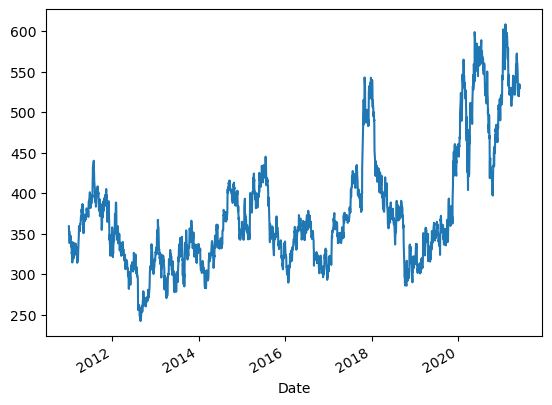

In [5]:
df['Close Price'].plot()

In [6]:
len(df)

2582

In [7]:
airtel_close=df['Close Price']

In [8]:
airtel_close.reset_index(drop=True,inplace=True)
airtel_close.shape

(2582,)

In [9]:
airtel_close=pd.DataFrame(airtel_close)

In [10]:
train=airtel_close.iloc[:2000]

In [11]:
test=airtel_close.iloc[582:]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
scaler.fit(train)

MinMaxScaler()

In [15]:
scaler_train=scaler.transform(train)
scaler_test=scaler.transform(test)

# Creating the Model

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
test.shape

(2000, 1)

In [18]:
help(TimeseriesGenerator) 

Help on class TimeseriesGenerator in module keras.src.preprocessing.sequence:

class TimeseriesGenerator(keras.src.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (su

In [19]:
length=582
batch_size=32
generator=TimeseriesGenerator(scaler_train,scaler_test,
                             length=length,batch_size=batch_size)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

In [21]:
n_features=1

In [22]:
model=Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


C:\Users\91751\AppData\Local\Temp\ipykernel_9600\3531706309.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


45/45 [==============================] - 3s 34ms/step - loss: 0.0460 - accuracy: 7.0522e-04
Epoch 2/10
45/45 [==============================] - 2s 34ms/step - loss: 0.0348 - accuracy: 7.0522e-04
Epoch 3/10
45/45 [==============================] - 2s 35ms/step - loss: 0.0231 - accuracy: 7.0522e-04
Epoch 4/10
45/45 [==============================] - 2s 35ms/step - loss: 0.0211 - accuracy: 7.0522e-04
Epoch 5/10
45/45 [==============================] - 2s 34ms/step - loss: 0.0193 - accuracy: 7.0522e-04
Epoch 6/10
45/45 [==============================] - 2s 36ms/step - loss: 0.0194 - accuracy: 7.0522e-04
Epoch 7/10
45/45 [==============================] - 2s 36ms/step - loss: 0.0194 - accuracy: 7.0522e-04
Epoch 8/10
45/45 [==============================] - 2s 35ms/step - loss: 0.0193 - accuracy: 7.0522e-04
Epoch 9/10
45/45 [==============================] - 2s 35ms/step - loss: 0.0189 - accuracy: 7.0522e-04
Epoch 10/10
45/45 [==============================] - 2s 35ms/step - loss: 0.0189 - a

In [26]:
losses=pd.DataFrame(model.history.history)

<Axes: >

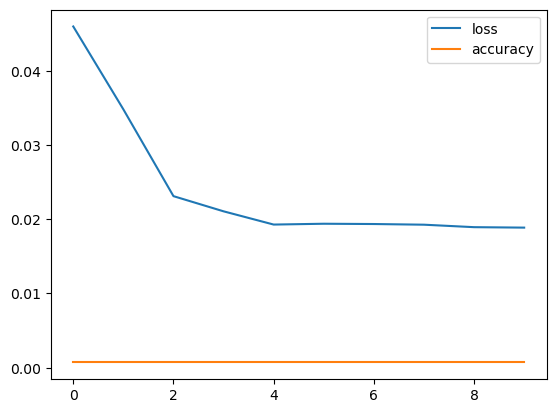

In [27]:
losses.plot()

# Evaluation

In [28]:
first_eval_batch=scaler_train[-length:]

In [29]:
first_eval_batch

array([[0.20885598],
       [0.21731903],
       [0.20946048],
       [0.19767266],
       [0.2037177 ],
       [0.23137373],
       [0.25479825],
       [0.20976273],
       [0.1867916 ],
       [0.21384313],
       [0.21595889],
       [0.277316  ],
       [0.3064833 ],
       [0.31781774],
       [0.32461841],
       [0.33897537],
       [0.35363458],
       [0.32159589],
       [0.3619465 ],
       [0.3835575 ],
       [0.39942572],
       [0.40426175],
       [0.41393381],
       [0.41997884],
       [0.41030679],
       [0.426175  ],
       [0.42511712],
       [0.41907209],
       [0.41846758],
       [0.39867009],
       [0.42269911],
       [0.47241953],
       [0.46743237],
       [0.48783437],
       [0.50566722],
       [0.45791144],
       [0.44703038],
       [0.44294998],
       [0.43750945],
       [0.43478918],
       [0.43962521],
       [0.42768626],
       [0.46833913],
       [0.45760919],
       [0.46304972],
       [0.46985039],
       [0.47408191],
       [0.470

Testing

In [30]:
first_eval_batch=first_eval_batch.reshape((1,length,1))

In [31]:
first_eval_batch

array([[[0.20885598],
        [0.21731903],
        [0.20946048],
        [0.19767266],
        [0.2037177 ],
        [0.23137373],
        [0.25479825],
        [0.20976273],
        [0.1867916 ],
        [0.21384313],
        [0.21595889],
        [0.277316  ],
        [0.3064833 ],
        [0.31781774],
        [0.32461841],
        [0.33897537],
        [0.35363458],
        [0.32159589],
        [0.3619465 ],
        [0.3835575 ],
        [0.39942572],
        [0.40426175],
        [0.41393381],
        [0.41997884],
        [0.41030679],
        [0.426175  ],
        [0.42511712],
        [0.41907209],
        [0.41846758],
        [0.39867009],
        [0.42269911],
        [0.47241953],
        [0.46743237],
        [0.48783437],
        [0.50566722],
        [0.45791144],
        [0.44703038],
        [0.44294998],
        [0.43750945],
        [0.43478918],
        [0.43962521],
        [0.42768626],
        [0.46833913],
        [0.45760919],
        [0.46304972],
        [0

In [32]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 148ms/step


array([[0.14902583]], dtype=float32)

In [33]:
scaler_test[0]

array([0.08795527])

In [34]:
test_predictions=[]
first_eval_batch=scaler_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))


In [35]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 25ms/step


In [36]:
test_predictions

[array([0.14902583], dtype=float32),
 array([0.14344293], dtype=float32),
 array([0.12500934], dtype=float32),
 array([0.16530977], dtype=float32),
 array([0.1524093], dtype=float32),
 array([0.15154052], dtype=float32),
 array([0.16016516], dtype=float32),
 array([0.16410826], dtype=float32),
 array([0.13942897], dtype=float32),
 array([0.1662173], dtype=float32),
 array([0.17975235], dtype=float32),
 array([0.14261967], dtype=float32),
 array([0.19984925], dtype=float32),
 array([0.16727808], dtype=float32),
 array([0.16515699], dtype=float32),
 array([0.14816108], dtype=float32),
 array([0.15973994], dtype=float32),
 array([0.16045192], dtype=float32),
 array([0.13018188], dtype=float32),
 array([0.20173937], dtype=float32),
 array([0.12218311], dtype=float32),
 array([0.16523999], dtype=float32),
 array([0.1650089], dtype=float32),
 array([0.14543588], dtype=float32),
 array([0.1718153], dtype=float32),
 array([0.1561805], dtype=float32),
 array([0.18643561], dtype=float32),
 array

In [37]:
true_predictions=scaler.inverse_transform(test_predictions)

In [38]:
true_predictions

array([[327.25519508],
       [325.40809299],
       [319.30934114],
       ...,
       [266.61108655],
       [442.59277868],
       [178.79638745]])

In [39]:
test['predictions']=true_predictions

C:\Users\91751\AppData\Local\Temp\ipykernel_9600\2081619921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_predictions


In [40]:
test

,Close Price,predictions
582,307.05,327.255195
583,301.60,325.408093
584,304.05,319.309341
585,304.25,332.642738
586,310.45,328.374617
...,...,...
2577,338.70,364.736190
2578,353.25,345.390125
2579,349.90,266.611087
2580,355.30,442.592779


<Axes: >

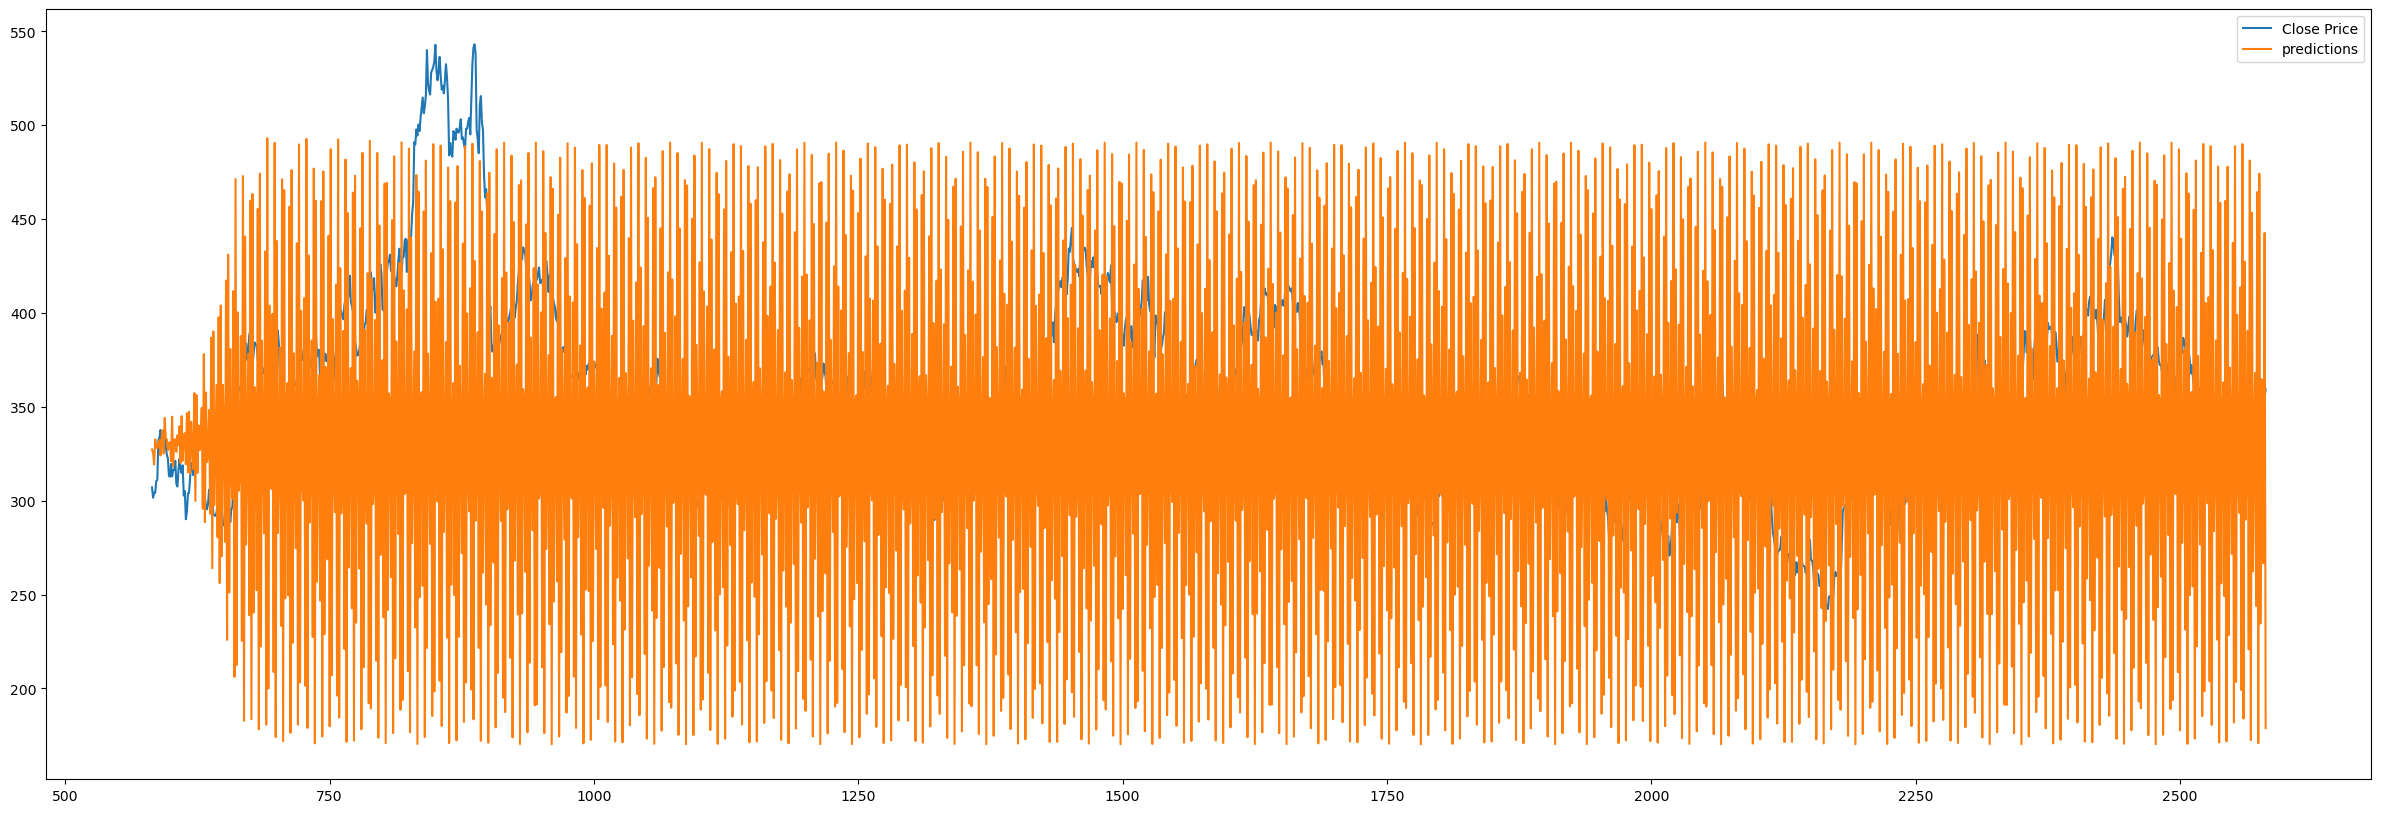

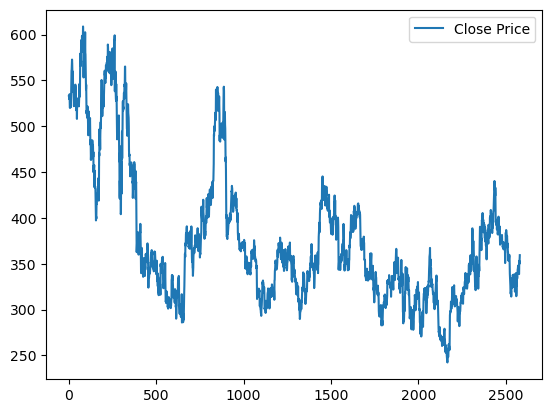

In [57]:
test.plot(figsize=(30,10))
airtel_close.plot()

In [58]:
#Full Model

In [59]:
full_scaler=MinMaxScaler()
scaler_full_data=full_scaler.fit_transform(airtel_close)

In [60]:
generator=TimeseriesGenerator(scaler_full_data,scaler_full_data,
                             length=length,batch_size=32)

In [62]:
model=Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [63]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


C:\Users\91751\AppData\Local\Temp\ipykernel_9600\3531706309.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


63/63 [==============================] - 3s 35ms/step - loss: 0.0227
Epoch 2/10
63/63 [==============================] - 2s 35ms/step - loss: 0.0111
Epoch 3/10
63/63 [==============================] - 2s 36ms/step - loss: 0.0064
Epoch 4/10
63/63 [==============================] - 2s 36ms/step - loss: 0.0054
Epoch 5/10
63/63 [==============================] - 2s 36ms/step - loss: 0.0048
Epoch 6/10
63/63 [==============================] - 2s 36ms/step - loss: 0.0036
Epoch 7/10
63/63 [==============================] - 2s 36ms/step - loss: 0.0030
Epoch 8/10
63/63 [==============================] - 2s 37ms/step - loss: 0.0028
Epoch 9/10
63/63 [==============================] - 2s 36ms/step - loss: 0.0028
Epoch 10/10
63/63 [==============================] - 2s 36ms/step - loss: 0.0024


<Axes: >

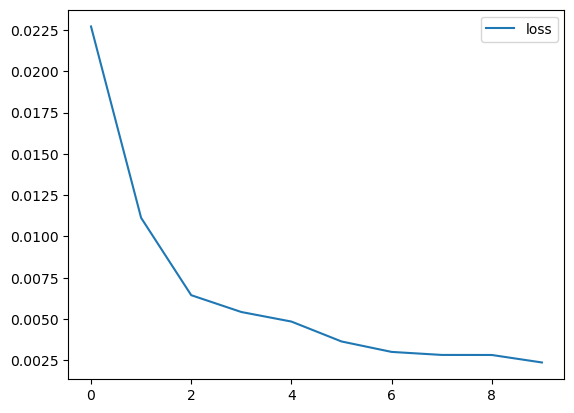

In [64]:
full_model_losses=pd.DataFrame(model.history.history)
full_model_losses.plot()

In [66]:
forecast=[]
first_eval_batch=scaler_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))
for i in range(20):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


In [67]:
forecast=scaler.inverse_transform(forecast)

In [68]:
forecast

array([[338.34514351],
       [333.18808528],
       [336.69639702],
       [340.50083709],
       [338.65740789],
       [348.12893457],
       [344.95355891],
       [344.70239263],
       [358.37194985],
       [348.19919763],
       [359.4911992 ],
       [360.04857084],
       [357.39154055],
       [365.22477737],
       [364.64503317],
       [366.35597716],
       [373.91638506],
       [367.87492531],
       [374.62341327],
       [377.76984954]])

In [69]:
forecast.flatten()

array([338.34514351, 333.18808528, 336.69639702, 340.50083709,
       338.65740789, 348.12893457, 344.95355891, 344.70239263,
       358.37194985, 348.19919763, 359.4911992 , 360.04857084,
       357.39154055, 365.22477737, 364.64503317, 366.35597716,
       373.91638506, 367.87492531, 374.62341327, 377.76984954])

In [70]:
df_array=np.array(airtel_close)
df_array

array([[532.7 ],
       [532.1 ],
       [529.6 ],
       ...,
       [349.9 ],
       [355.3 ],
       [359.35]])

<Axes: >

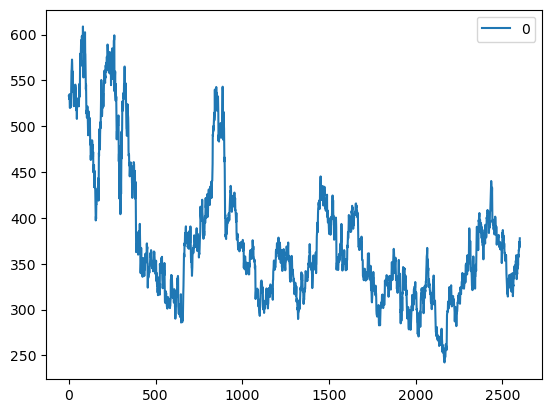

In [71]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))
full_data.plot()

# LTSM Model

In [72]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [73]:
length

582

In [74]:
scaler_test.shape

(2000, 1)

In [75]:
length=999
generator=TimeseriesGenerator(scaler_train,scaler_train,
                             length=length,batch_size=32)
validation_generator=TimeseriesGenerator(scaler_test,scaler_test,
                                        length=length,batch_size=32)

In [80]:
model=Sequential()
model.add(LSTM(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [81]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop],shuffle=False)

Epoch 1/20


C:\Users\91751\AppData\Local\Temp\ipykernel_9600\3868429774.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


32/32 [==============================] - 10s 261ms/step - loss: 0.0201 - val_loss: 0.0058
Epoch 2/20
32/32 [==============================] - 8s 251ms/step - loss: 0.0070 - val_loss: 0.0044
Epoch 3/20
32/32 [==============================] - 8s 249ms/step - loss: 0.0042 - val_loss: 0.0030
Epoch 4/20
32/32 [==============================] - 8s 256ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 5/20
32/32 [==============================] - 8s 252ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 6/20
32/32 [==============================] - 8s 249ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 7/20
32/32 [==============================] - 8s 249ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 8/20
32/32 [==============================] - 8s 248ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 9/20
32/32 [==============================] - 8s 249ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 10/20
32/32 [==============================] - 8s 249ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 11/

<Axes: >

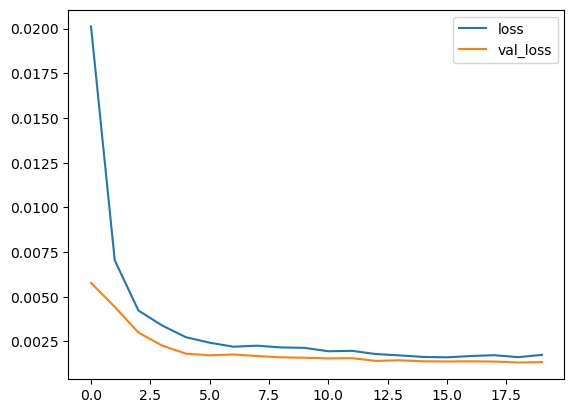

In [82]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [83]:
test_predictions=[]
first_eval_batch=scaler_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 45ms/step


C:\Users\91751\AppData\Local\Temp\ipykernel_9600\2237599579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_Predections']=true_predictions


<Axes: >

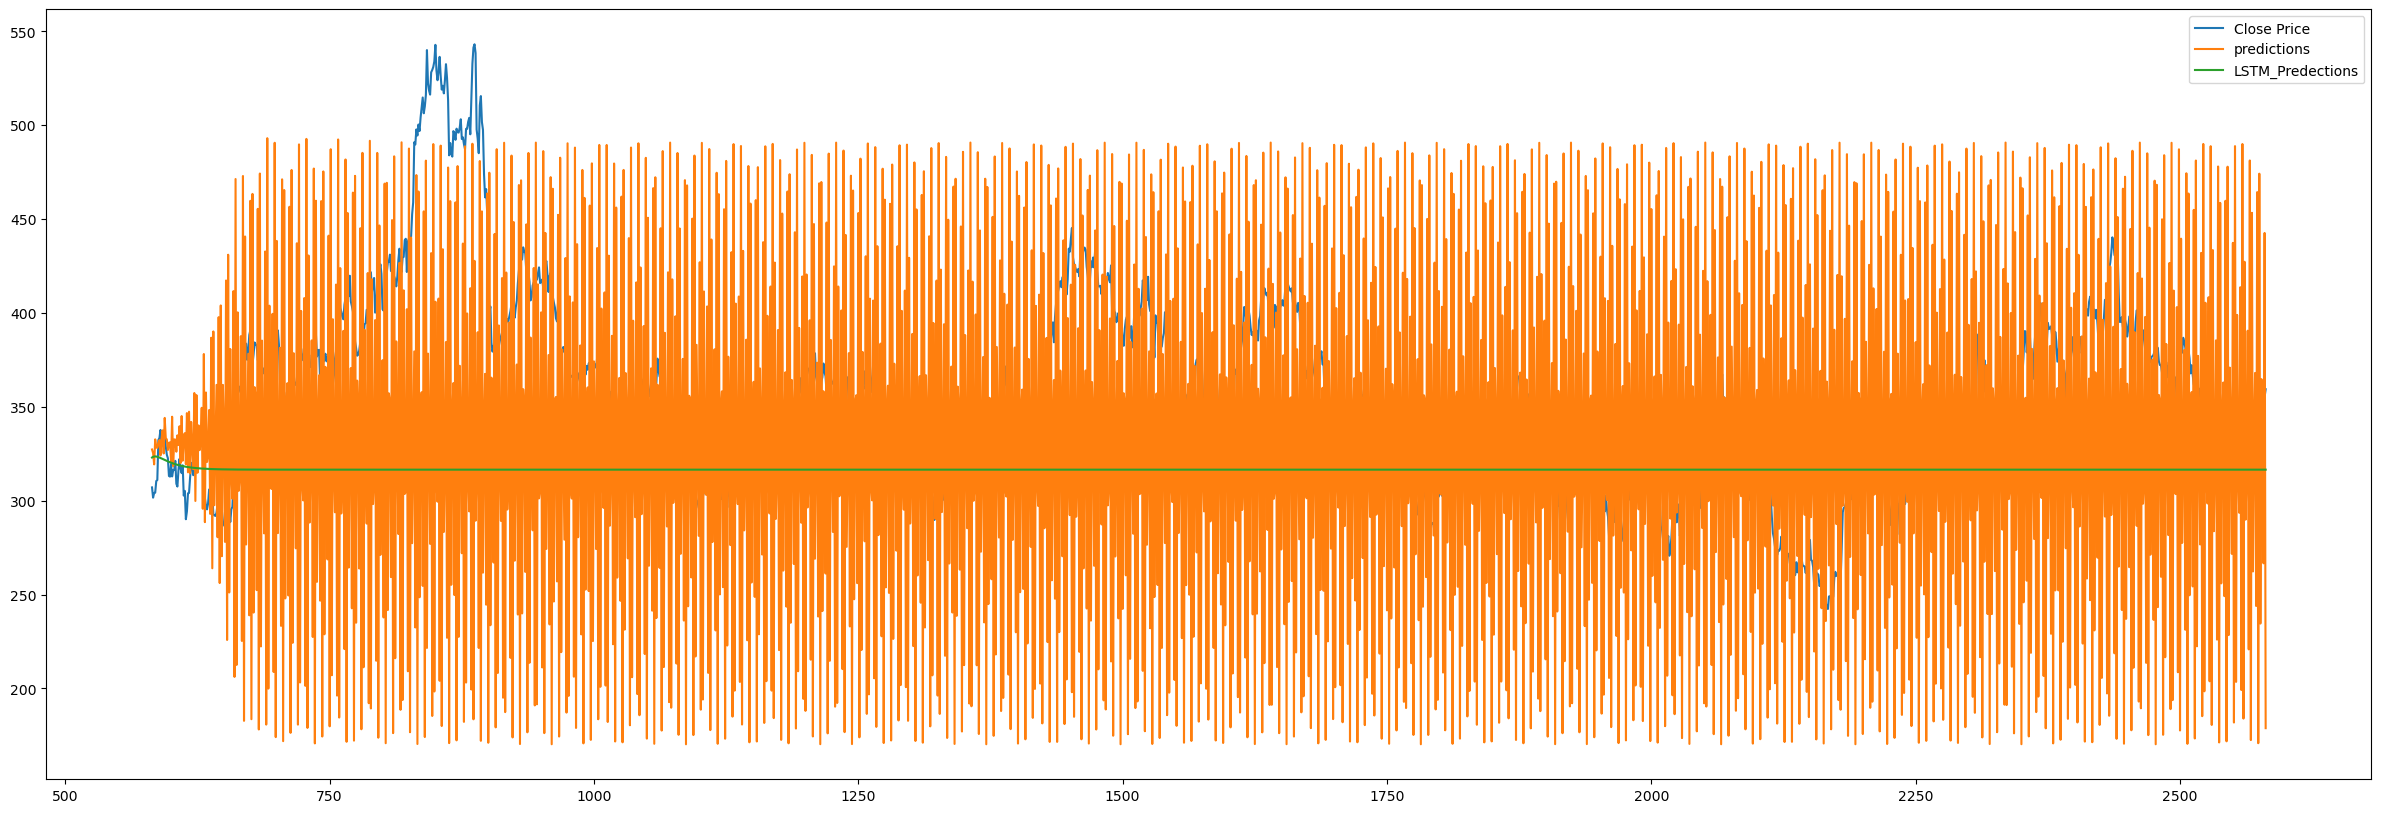

In [84]:
true_predictions=scaler.inverse_transform(test_predictions)
test['LSTM_Predections']=true_predictions
test.plot(figsize=(30,10))

In [85]:
forecast=[]
first_eval_batch=scaler_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))
for i in range(15):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 49ms/step


In [86]:
forecast=scaler.inverse_transform(forecast)

In [89]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

<Axes: >

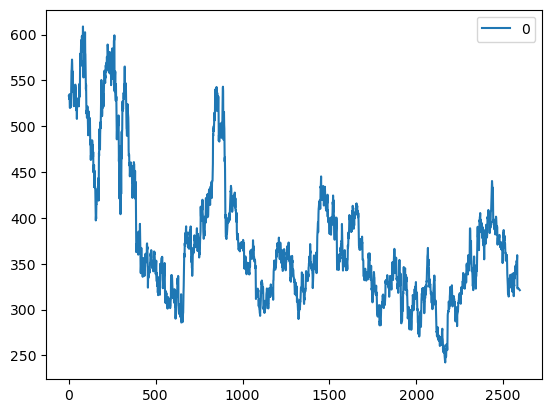

In [90]:
full_data.plot()

In [91]:
forecast

array([[322.96850745],
       [323.33427766],
       [323.51471746],
       [323.55736732],
       [323.49922725],
       [323.36840346],
       [323.18610996],
       [322.96828067],
       [322.7268956 ],
       [322.47094224],
       [322.2071501 ],
       [321.94056262],
       [321.67495129],
       [321.41308187],
       [321.1570299 ]])

In [93]:
full_data.tail(30)

,0
2567,336.600000
2568,340.300000
2569,344.050000
2570,344.500000
2571,347.600000
2572,342.700000
2573,346.050000
2574,348.500000
2575,339.200000
2576,338.850000
